In [ ]:
# download the predictive coding repository
!git clone jgornet/predictive-coding
%cd predictive-coding

# install prerequisite packages
!apt-get install -y xpra openjdk-8-jdk libboost-all-dev libpython3.5 openjdk-8-jdk ffmpeg python-tk -qq > /dev/null

# set the environment variable for Java
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# set Java 8 as the default Java
!update-java-alternatives --set /usr/lib/jvm/java-1.8.0-openjdk-amd64

# download and unzip the Malmo framework
!wget https://github.com/microsoft/malmo/releases/download/0.37.0/Malmo-0.37.0-Linux-Ubuntu-18.04-64bit_withBoost_Python3.6.zip
!unzip Malmo-0.37.0-Linux-Ubuntu-18.04-64bit_withBoost_Python3.6.zip
!mv Malmo-0.37.0-Linux-Ubuntu-18.04-64bit_withBoost_Python3.6.zip malmo

# open the Malmo framework
%cd malmo/Minecraft

In [ ]:
# startup the display agent for Malmo
!xpra start :100
os.environ["DISPLAY"] = ":100"

# startup Malmo as a background process
!nohup ./launchClient.sh &

In [ ]:
%cd /content/predictive-coding/malmo/notebooks

In [2]:
from predictive_coding.generator import EnvironmentGenerator

# load the environment
os.environ["MALMO_XSD_PATH"] = "../malmo/Schemas/"
environment = EnvironmentGenerator("../environments/natural.xml", 10000)

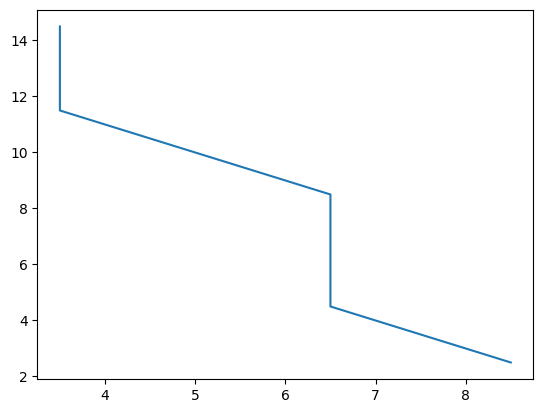

In [4]:
import matplotlib.pyplot as plt

# generate a path to a random position from the agent's current position 
path = environment.generate_path()
plt.plot(path[0], path[1])


In [5]:
# generate a sequence of images from the agent's traversal
batch = next(iter(environment))

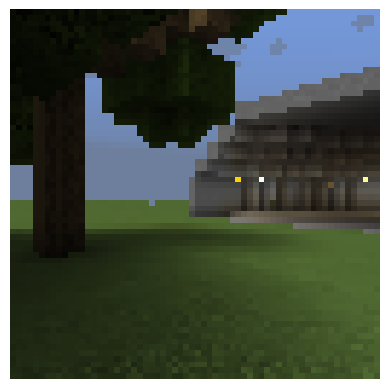

In [6]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()

# visualize the agent's traversal
ims = []
for i in range(50):
    im = ax.imshow(batch[0][i], animated=True)
    ax.axis("off")
    if i == 0:
        ax.imshow(batch[0][0])  # show an initial one first
        ax.axis("off")
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
HTML(ani.to_html5_video())


In [ ]:
from pathlib import Path

# generate a sample dataset
environment.generate_dataset(Path("../datasets/sample-dataset"))